# Deriving Geoid using Spherical Harmonics

In [1]:
% data folder
addpath(genpath('/media/abhishek/DATA/MSR/SEM-I/Grace-Hack-Week-2/Software'));


In [2]:
load coast

# Different Satellite only Geoid Models

In [3]:
fileName = "/media/abhishek/DATA/MSR/SEM-II/Environmental-Geodesy/geoid_models/GOCE_Only/ITU_GGC16.gfc"

fileName = /media/abhishek/DATA/MSR/SEM-II/Environmental-Geodesy/geoid_models/GOCE_Only/ITU_GGC16.gfc


In [4]:
[cs, ncs, header, cst, ncst] = readicgem(fileName);

/media/abhishek/DATA/MSR/SEM-II/Environmental-Geodesy/geoid_models/GOCE_Only/ITU_GGC16.gfc read in 24.612 seconds
params =

  scalar structure containing the fields:

    max_lm = Inf
    gcoef2sc = 0
    display_warning = 1
    sub_wgs84 = 0

params =

  scalar structure containing the fields:

    max_lm = Inf
    gcoef2sc = 0
    display_warning = 1
    sub_wgs84 = 0



In [5]:
header

header =

  scalar structure containing the fields:

    product_type = gravity_field 
    modelname = ITU_GGC16 
    GM = 3.9860e+14
    ae = 6.3781e+06
    max_degree = 280
    errors = formal 
    norm = fully_normalized 
    tide_system = zero tide 
    key =
    {
      [1,1] = L
      [1,2] = M
      [1,3] = C
      [1,4] = S
      [1,5] = sigma
      [1,6] = C
      [1,7] = sigma
      [1,8] = S
    }




In [5]:
lmax = header.max_degree
ae = header.ae
GM = header.GM

lmax = 280
ae = 6.3781e+06
GM = 3.9860e+14


In [6]:
img   = imagesc(-lmax:lmax,0:lmax,log10(abs(cs2sc(cs))));
colormap(jet);
colormap(jet(256));
caxis([-10, -8]);

x0=0;
y0=0;
width=1600;
height=800;
set(gcf,'position',[x0,y0,width,height])
xlabel("Order m")
ylabel("Degree n")
title("Visualizing the SH Coefficients for the Static Geoid")
c = colorbar;
set(get(c,'XLabel'),'String',"SH")
set(get(c,'YLabel'),'String','log10')        

In [14]:
img   = imagesc(-lmax:lmax,0:lmax,log10(abs(cs2sc(ncs))));
colormap(jet);
colormap(jet(256));
caxis([-13, -10]);

x0=0;
y0=0;
width=1600;
height=800;
set(gcf,'position',[x0,y0,width,height])
xlabel("Order m")
ylabel("Degree n")
title("Visualizing the Sigma SH Coefficients for the Static Geoid")
c = colorbar;
set(get(c,'XLabel'),'String',"SH")
set(get(c,'YLabel'),'String','log10')        

In [6]:
checkshformat(cs)

ans = cs


In [7]:
% Geoid field
nklm = normalklm(lmax, "wgs84"); % normal potential wgs84
size(nklm)

ans =

   281   281



In [8]:
geoid_field = gshs_(cs, 'max_lm', lmax, 'quant', 'geoid', 'sub_WGS84', false, 'grid', 'block', 'gridsize', 280);

gshs ...   0% [                                2% [=                               3% [=                               4% [=                               5% [=                               6% [=                               7% [=                               8% [==                              9% [==                             10% [==                             11% [===                            12% [===                            13% [===                            14% [===                            15% [====                           16% [====                           17% [====                           18% [=====                          19% [=====                          20% [=====                          21% [======                         22% [======                         23% [======                         24% [======                         25% [=======                        26% [=======                        27% [=======                        28% [========     

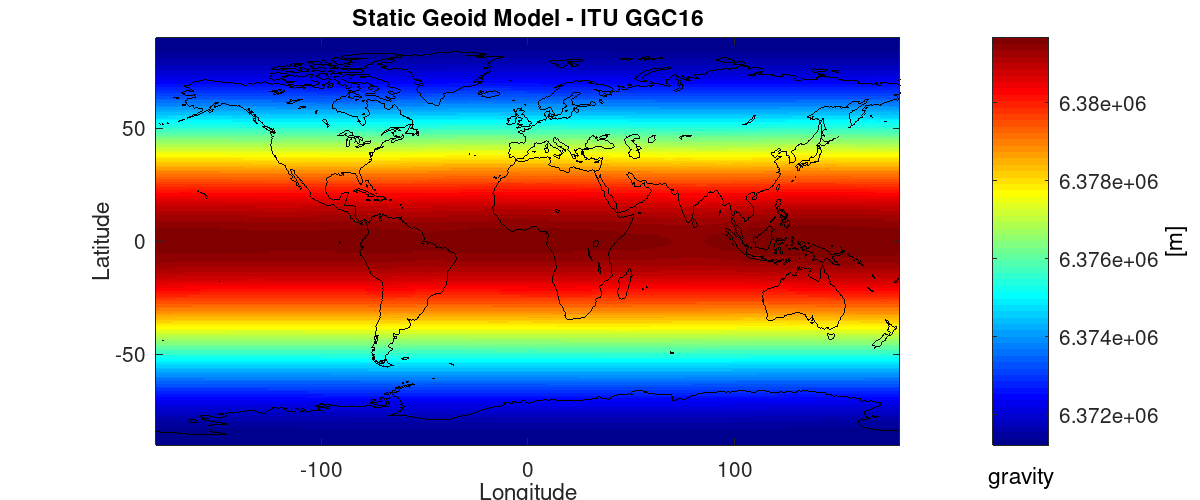

In [71]:
n = size(geoid_field,1);
dt      = 180/(n - 1);
theta   = (dt/2:dt:180)';
lam     = (dt/2:dt:360);

lam(lam > 180)  = lam(lam > 180) - 360;
[lam,indx]      = sort(lam);
f = geoid_field(:,indx);
imagesc(lam, 90-theta, f);
colormap(jet)
hold on;

plot(long,lat,'k')
axis xy

xlabel("Longitude")
ylabel("Latitude")
title("Static Geoid Model - ITU GGC16")
x0=0;
y0=0;
width=1200;
height=500;
set(gcf,'position',[x0,y0,width,height])
c = colorbar();
set(get(c,'XLabel'),'String',"gravity")
set(get(c,'YLabel'),'String','[m]')        

In [63]:
% Normal geoid field - WGS84
normal_field = gshs_(nklm, 'max_lm', lmax, 'quant', 'geoid', 'sub_WGS84', false, 'grid', 'block', 'gridsize', 280);

gshs ...   0% [                                2% [=                               3% [=                               4% [=                               5% [=                               6% [=                               7% [=                               8% [==                              9% [==                             10% [==                             11% [===                            12% [===                            13% [===                            14% [===                            15% [====                           16% [====                           17% [====                           18% [=====                          19% [=====                          20% [=====                          21% [======                         22% [======                         23% [======                         24% [======                         25% [=======                        26% [=======                        27% [=======                        28% [========     

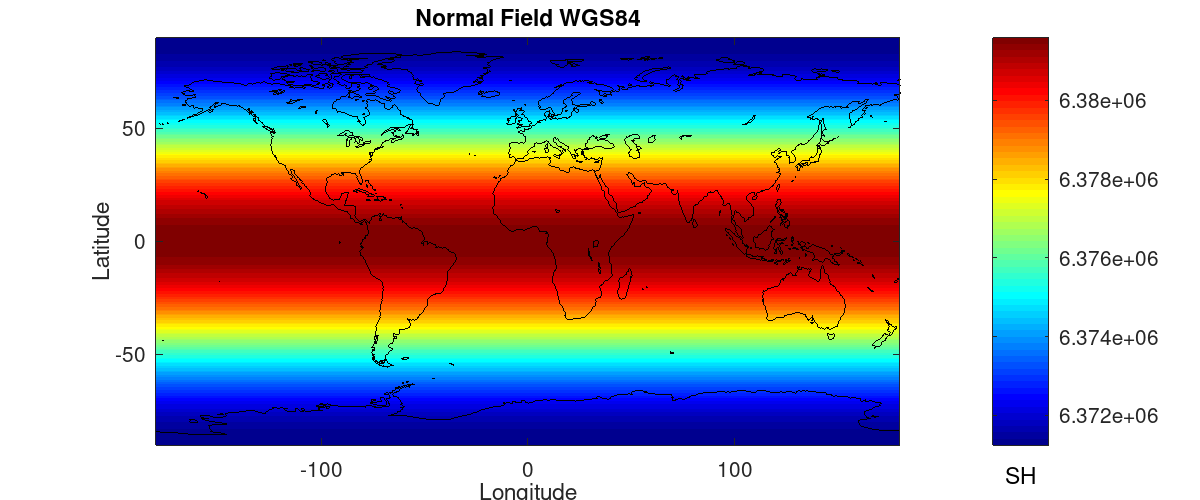

In [64]:
n = size(geoid_field,1);
dt      = 180/(n - 1);
theta   = (dt/2:dt:180)';
lam     = (dt/2:dt:360);

lam(lam > 180)  = lam(lam > 180) - 360;
[lam,indx]      = sort(lam);
f = normal_field(:,indx);
imagesc(lam, 90-theta, f);
colormap(jet)
hold on;

plot(long,lat,'k')
axis xy

xlabel("Longitude")
ylabel("Latitude")
title("Normal Field WGS84")
x0=0;
y0=0;
width=1200;
height=500;
set(gcf,'position',[x0,y0,width,height])
c = colorbar();
set(get(c,'XLabel'),'String',"gravity")
set(get(c,'YLabel'),'String','[m]')        

In [6]:
% Substracting normal field
geoid_field = gshs_(cs, 'max_lm', lmax, 'quant', 'geoid', 'sub_WGS84', true, 'grid', 'block', 'gridsize', 280);

    gshs_ at line 179 column 9

gshs ...   0% [                                2% [=                               3% [=                               4% [=                               5% [=                               6% [=                               7% [=                               8% [==                              9% [==                             10% [==                             11% [===                            12% [===                            13% [===                            14% [===                            15% [====                           16% [====                           17% [====                           18% [=====                          19% [=====                          20% [=====                          21% [======                         22% [======                         23% [======                         24% [======                         25% [=======                        26% [=======                        27% [=======          

In [73]:
n = size(geoid_field,1);
dt      = 180/(n - 1);
theta   = (dt/2:dt:180)';
lam     = (dt/2:dt:360);

lam(lam > 180)  = lam(lam > 180) - 360;
[lam,indx]      = sort(lam);
f = geoid_field(:,indx);
imagesc(lam, 90-theta, f);
colormap(jet)
hold on;

plot(long,lat,'k')
axis xy

xlabel("Longitude")
ylabel("Latitude")
title("Geoid")
x0=0;
y0=0;
width=1200;
height=500;
set(gcf,'position',[x0,y0,width,height])
c = colorbar();
set(get(c,'XLabel'),'String',"Geoid")
set(get(c,'YLabel'),'String','[m]')        

In [84]:
% Standard grid
globalmean(f, 'spatial', 'mesh')

ans = 3.3014


In [90]:
help("gshs_grid")

'gshs_grid' is a function from the file /media/abhishek/DATA/MSR/SEM-I/Grace-Hack-Week-2/Software/SHbundle-master/gshs_grid.m

 GSHSAG calculates a global spherical harmonic synthesis for any grid 
 defined by lam and phi (both vectors). The radius must be scalar.
 Multiple sets of Stokes coefficients can be inserted as 3D matrix. 
 
 f = gshs_grid(field, lamRAD, phiRAD, a_E)

 IN:
    field ....... gravity field in |c\s| or /s|c\ format            [r, c, d]
                  (in case of multiple SH coefficients: one set per layer d of the 3D matrix)
    lamRAD ...... longitude [rad]                                   [n, 1]
    phiRAD ...... latitude  [rad]                                   [m, 1]
    a_E ......... semi major axis of the Earth rotational ellipsoid [1, 1]
 OPTIONAL:
    'height' .... (default: 0), height [m]                        [scalar]
    'max_lm' .... maximum degree/order (default: determined from field)
                                                            

In [91]:
help("gshs_ptw")

'gshs_ptw' is a function from the file /media/abhishek/DATA/MSR/SEM-I/Grace-Hack-Week-2/Software/SHbundle-master/gshs_ptw.m

 GSHS_PTW calculates a pointwise global spherical harmonic synthesis. 

 f = gshs_ptw(field, lamRAD, phiRAD, r, a_E);

 IN:
    field ....... gravity field in |c\s| or /s|c\ format
    lamRAD ...... longitude [rad]                                    [n, 1]
    phiRAD ...... latitude  [rad]                                    [n, 1]
    r ........... radius    [m]                                      [1, 1]
    a_E ......... semi major axis of the Earth rotational ellipsoid  [1, 1]
 OPTIONAL:
    'max_lm' .... maximum degree/order (default: determined from field)
    'quant' ..... field quantity; possible values:
                  - 'potential' ... (default), potential [m^2/s^2], needs 'GM'
                  - 'tr' .......... gravity disturbance [mGal], needs 'GM'
                  - 'trr' ......... 2nd rad. derivative [E], needs 'GM'
                  - 'none' ...

In [36]:
dt = 0.1;
lamDEG = (45:dt:80);
phiDEG = (-15:dt:30);

lamRAD = deg2rad(lamDEG);
phiRAD = deg2rad(phiDEG);


In [37]:
[xx, yy] = meshgrid(lamDEG, phiDEG);

In [38]:
geoid_grid = gshs_grid(cs, lamRAD, phiRAD, ae, 'max_lm', lmax, 'quant', 'geoid', 'GM', GM, 'sub_WGS84', true);

    gshs_grid at line 148 column 9



In [10]:
size(geoid_grid)

ans =

   451   351



In [32]:
imagesc(lamDEG, phiDEG, geoid_grid);
colormap(jet);
c = colorbar();
caxis([-100 20]);
hold on;

plot(long,lat,'k');
axis xy;

set(get(c,'XLabel'),'String',"Geoid");

set(get(c,'YLabel'),'String','[m]');
xlabel("Longitude (deg)")
ylabel("Latitude (deg)")
title("0.1{deg} Geoid grid")
x0=0;
y0=0;
width=600;
height=600;
set(gcf,'position',[x0,y0,width,height])

In [39]:
% data in the grid
geoid_grid(1:5, 1:5)

ans =

  -24.630  -24.509  -24.326  -24.088  -23.800
  -24.973  -24.854  -24.675  -24.442  -24.165
  -25.197  -25.083  -24.913  -24.694  -24.435
  -25.323  -25.218  -25.061  -24.860  -24.624
  -25.379  -25.284  -25.144  -24.964  -24.755



In [40]:
mat = [];
for i = [1: length(phiDEG)]
    for j = [1: length(lamDEG)]
        mat(end+1,:) = [phiDEG(i); lamDEG(j); geoid_grid(i, j)];
    end
end

In [43]:
csvwrite ("geoid_grid_updated.txt", mat)

In [41]:
size(mat)

ans =

   158301        3

